In [10]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

In [ ]:
PART ONE:PREPARE THE DATA

In [12]:

#import csv file
PT1 ="/Users/irawobebeyi/Desktop/myopia.csv"
df = pd.read_csv(PT1)
df.head(10)



,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [13]:
df1 = df.drop(columns=['MYOPIC'])
df1.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0


In [ ]:
PART TWO:APPLY DIMENTIONALITY REDUCTION 

In [17]:
from sklearn.preprocessing import StandardScaler
#declare x
x = df1[[
    "AGE",
    "SPHEQ",
    "AL",
    "ACD",
    "LT",
    "VCD",
    "SPORTHR",
    "READHR",
    "COMPHR",
    "STUDYHR",
    "TVHR",
    "DIOPTERHR",
    "MOMMY",
    "DADMY"
]]
#standerdizing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [18]:
from sklearn.decomposition import PCA
#Dimension reduction
pca = PCA(n_components = 0.9)
ndata = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [26]:
from sklearn.manifold import TSNE
#Applying TSNE
tsne = TSNE(learning_rate = 50)
tsne_f = tsne.fit_transform(df)
tsne_f.shape

/Users/irawobebeyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

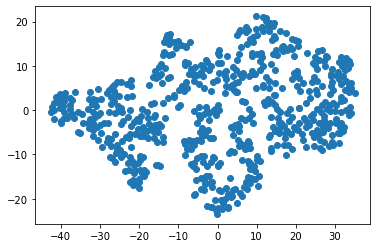

In [27]:
plt.scatter(tsne_f[:,0], tsne_f[:,1])
plt.show()

In [ ]:
PART THREE:CLUSTER ANALYSIS WITH K-means

In [29]:
from sklearn.cluster import KMeans
#K - means
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_f)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


,k,inertia
0,1,313878.468750
1,2,130813.453125
2,3,83613.914062
3,4,57115.027344
4,5,44448.500000


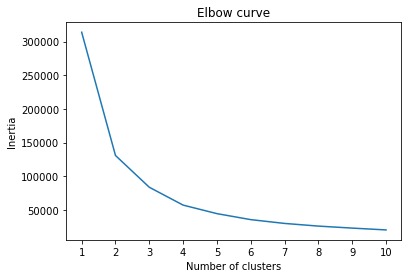

In [30]:
#Plotting the data to find the most efficient k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

RECOMMENDED

From the above, it can be concluded that we can cluster patients into 5 main clusters.
As we scaled the data, and then we applied PCA, as well as TSNE, we made our data more focused on what we need, thus giving us a more reliable answer